## MAT 653 
#### Wei Li

### Simulated Annealing

R.C. example 5.2, 5.9

A simulated sample of 400 observations from this mixture with $\mu_1 = 0$ and $\mu_2 = 2.5$
be careful, some parts of the code in the book are incorrect.

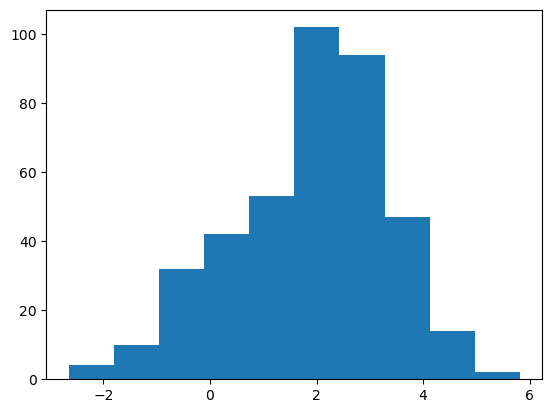

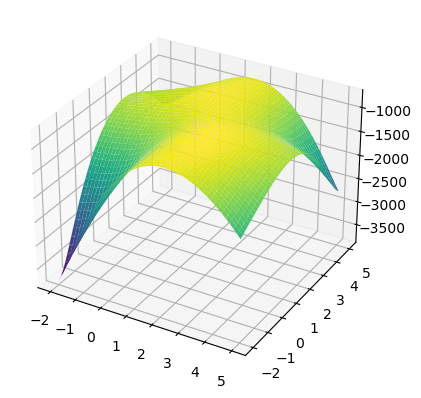

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from numpy import meshgrid

# Generate data
N = 400
components = np.random.choice([1, 2], p=[0.25, 0.75], size=N)
mu = np.array([0, 2.5])
da = np.random.randn(N) + mu[components - 1]
plt.hist(da)
plt.show()

# Log-likelihood function
def like(mu):
    return np.sum(np.log(0.25 * norm.pdf(da - mu[0]) + 0.75 * norm.pdf(da - mu[1])))

# Grid for likelihood values
mu1 = np.linspace(-2, 5, 250)
mu2 = np.linspace(-2, 5, 250)
mu1_grid, mu2_grid = meshgrid(mu1, mu2)
lli = np.zeros((250, 250))

for i in range(250):
    for j in range(250):
        lli[i, j] = like([mu1[i], mu2[j]])

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(mu1_grid, mu2_grid, lli, cmap='viridis')
plt.show()

# Simulated Annealing Function
def SA(x):
    temp = 1
    scale = 1
    iter = 1
    dif = 1
    the = np.array([x])
    curlike = hval = like(x)
    
    while dif > 1e-4:
        prop = the[-1, :] + np.random.randn(2) * scale
        if np.max(-prop) > 2 or np.max(prop) > 5 or temp * np.log(np.random.rand()) > like(prop) - curlike:
            prop = the[-1, :]
        curlike = like(prop)
        hval = np.append(hval, curlike)
        the = np.vstack([the, prop])
        iter += 1
        temp *= (1 / 1.5) ** iter
        dif = (iter < 3000) + np.max(hval) - np.max(hval[:int(iter / 2)])
    
    return {'theta': the, 'like': hval, 'ite': iter}


Iterations: 6808
Last 10 solutions:
[[0.04178117 2.52199242]
 [0.04178117 2.52199242]
 [0.04178117 2.52199242]
 [0.04178117 2.52199242]
 [0.04178117 2.52199242]
 [0.04178117 2.52199242]
 [0.04178117 2.52199242]
 [0.04178117 2.52199242]
 [0.04178117 2.52199242]
 [0.04178117 2.52199242]]


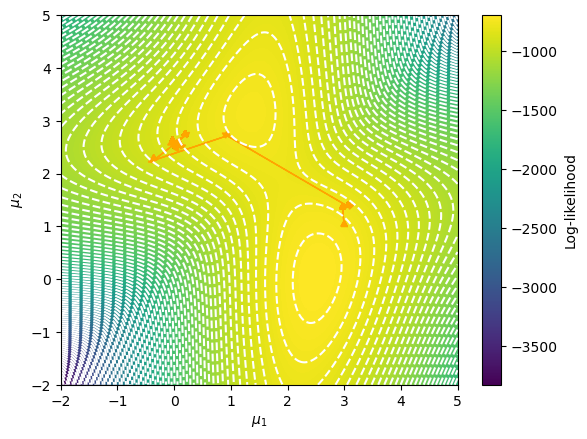

In [2]:

# Starting point (3,1)
outcome = SA([3, 1])
print("Iterations:", outcome['ite'])
sols = outcome['theta']
print("Last 10 solutions:")
print(sols[-10:, :])

# Heatmap
plt.imshow(lli, extent=[-2, 5, -2, 5], origin='lower',
           cmap='viridis', aspect='auto')
plt.colorbar(label='Log-likelihood')
plt.xlabel(r'$\mu_1$')
plt.ylabel(r'$\mu_2$')
plt.contour(mu1, mu2, lli, levels=100, colors='white')

# Plot the iterations
for j in range(outcome['ite'] - 1):
    plt.arrow(sols[j, 0], sols[j, 1], sols[j + 1, 0] - sols[j, 0], sols[j + 1, 1] - sols[j, 1],
              head_width=0.1, head_length=0.1, fc='orange', ec='orange')

plt.show()
